## Chapter 14: Tree-based learners

# 14.1  Stumps and trees

- In Section 11.1 we saw the simplest, and perhaps most popular, exemplar of a tree-based learner: the *stump*

- In this brief Section see how general tree-based learners are defined recursively in terms of the basic notion of a stump

In [52]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import math_optimization_library as optlib

from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

static_plotter = optlib.static_plotter.Visualizer()
regress_plotter = nonlib.nonlinear_regression_demos


# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# plotting
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 14.1.1  Tree-based universal approximators 

In Section 11.1 we learned about a basic exemplar of the tree-based universal approximators: the stump.  The stump, a simple *discrete step function*, consists of a two levels or steps (which can be set independently) and a split point defining a linear boundary between the two levels.  This split point separates the two levels linearly *along a single input axis only*, as illustrated in the Figure below.  This makes the stump function an especially simple step.

<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth1.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 1:</strong> <em> 
An illustration of a *stump* function from the family of tree-based universal approimators.  Here $V_1$ is called the *split point* and $y_1$ / $y_2$ the *levels* of the function.  ADD VERSION IN 3D.
</em>
</figcaption>
</figure>

To create a more flexible decision tree-based units we simply recurse and split each level of the stump, introducing two new split points and creating a unit with *four* discrete steps.  This gives us a *tree* of depth two (our first split gave us a stump, another phrase for stump is tree of depth one).  Such a depth two tree unit is illustrated both algebraically and graphically in the Figure below.


<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth2.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 2:</strong> <em> 
An illustration of a depth two tree function from the family of tree-based universal approimators.  Here $V_1$, $V_2$, and $V_3$ are called *split points* and $y_1$ / $y_2$ / $y_3$ / $y_4$ the *levels* of the function.  ADD 3D PANEL
</em>
</figcaption>
</figure>

This added flexibility provides a depth two tree unit significantly greater capacity than its stump relative, since the location of the split points and the value set to the levels can be set in many ways.  Below we illustrate $4$ instances of a single-input depth two tree.

<IPython.core.display.Javascript object>


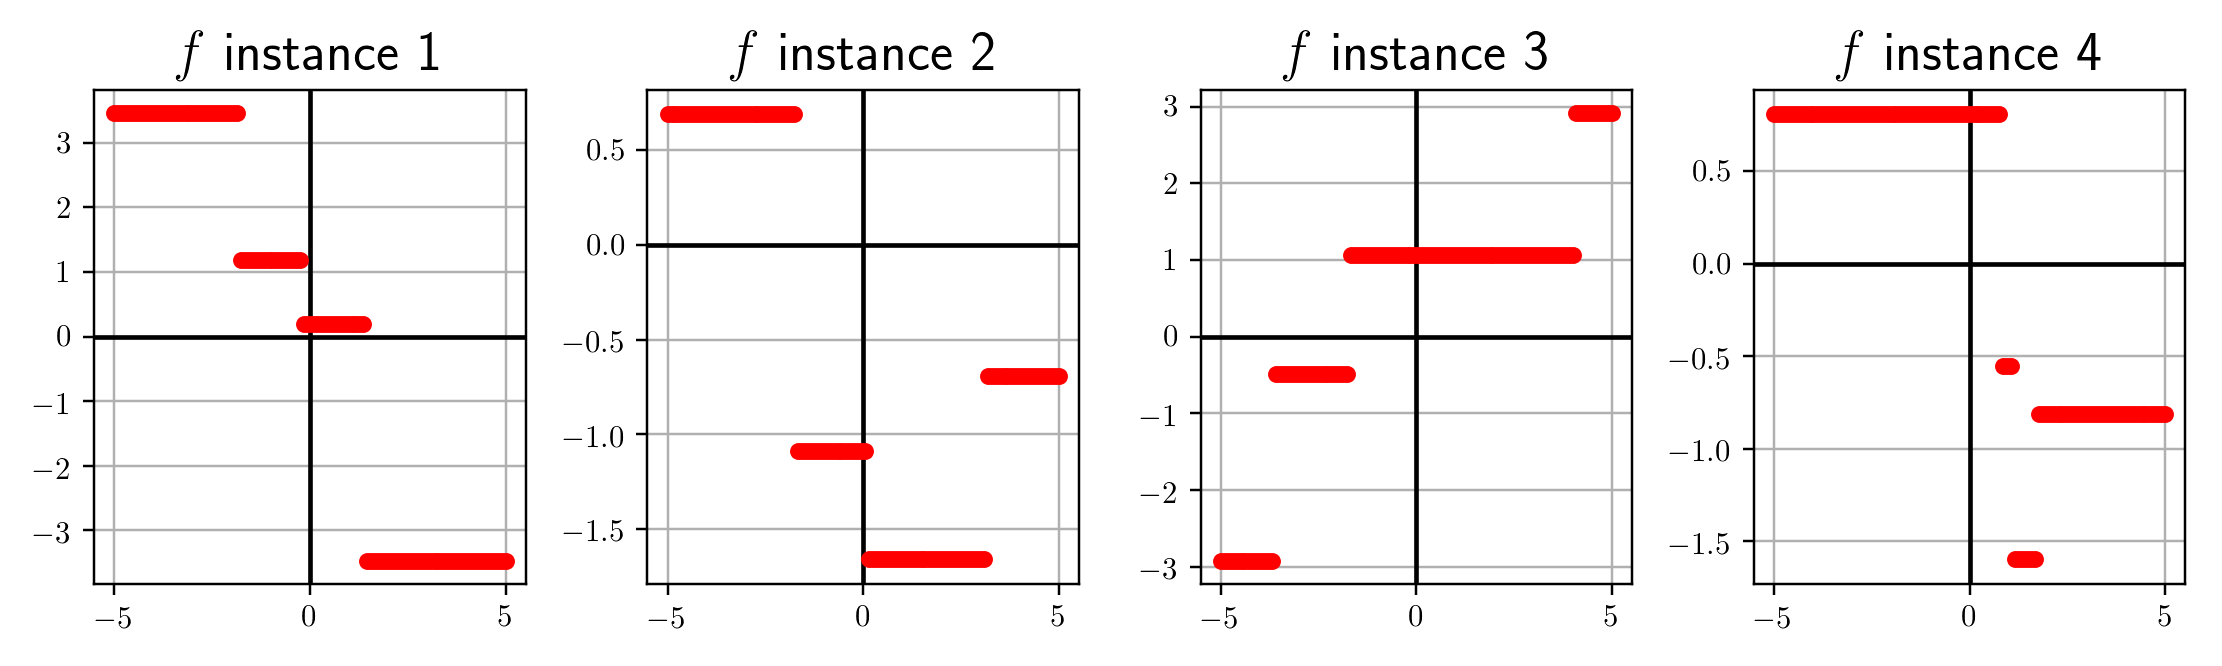

In [54]:
## This code cell will not be shown in the HTML version of this notebook
# build 4 instances of a composition basis: line and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    fm = w_2*np.sign(w_0 + w_1*x)
    
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    gm = w_2*np.sign(w_0 + w_1*x)
    
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    bm = w_2*np.sign(w_0 + w_1*x)
    fm += gm
    fm += bm
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.scatter(fm_table[:,0],fm_table[:,1],c='r',s = 20,zorder = 3)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

More generally, we can create a depth $D$ tree by recursing in the same way, adding a split point per step and splitting each in two along a single input axis, creating a tree-based universal approximator with $D$ split points and $2^D$ discrete steps.

## 14.2  Generating tree-based approximators

- We can build deeper trees by either
    - recursing
    - combining stumps
    
- In this Section I think we should basically just provide the big picture sense
    - even if this is not here, huh maybe doesn't go here